In [1]:
pip install nltk

     |████████████████████████████████| 1.5MB 3.3MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlrd

     |████████████████████████████████| 112kB 3.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

     |████████████████████████████████| 368kB 3.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lda

     |████████████████████████████████| 358kB 3.4MB/s eta 0:00:01
     |████████████████████████████████| 102kB 22.3MB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

     |████████████████████████████████| 7.3MB 3.5MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing all the packages required for the data analysis
import pandas as pd ## for feautre engineering
import numpy as np  ## for feautre engineering
import matplotlib as mpl ## for plot
import matplotlib.pyplot as plt ## for plot
import seaborn as sns  ## for plot
import datetime, nltk, warnings 
import matplotlib.cm as cm
from scipy.stats import norm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import NMF
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
import lda
from sklearn.decomposition import SparsePCA 
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import plotly.graph_objs as go

import plotly.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
pyoff.init_notebook_mode()

color = sns.color_palette()
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
# read the datafile

# loading the dataset: 
df_initial = pd.read_excel('Online Retail.xlsx', encoding="ISO-8859-1",
                          dtype={'InvoiceID': str})
                        
display(df_initial.shape)

# Top 10 observations of our data:
display(df_initial.head(10))

(541909, 8)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom  
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom  
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom  
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom

In [3]:
#____________________________________________________________
# converting invoiceDate to datetime
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate']) 

#____________________________________________________________
# some info on columns types and find number of columns with null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))

# displaying the observations with missing values and thier percentage count
display(tab_info)

InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type         object    object      object    int64  datetime64[ns]   
null values (nb)         0         0        1454        0               0   
null values (%)          0         0    0.268311        0               0   

                 UnitPrice CustomerID Country  
column type        float64    float64  object  
null values (nb)         0     135080       0  
null values (%)          0    24.9267       0

In [4]:
df_initial.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df_initial.shape)

#____________________________________________________________
# checking to see if we have removed all observations with missing values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
# checking the dataset status after dropping the missing values
display(tab_info)

Dataframe dimensions: (406829, 8)


InvoiceNo StockCode Description Quantity     InvoiceDate  \
column type         object    object      object    int64  datetime64[ns]   
null values (nb)         0         0           0        0               0   
null values (%)          0         0           0        0               0   

                 UnitPrice CustomerID Country  
column type        float64    float64  object  
null values (nb)         0          0       0  
null values (%)          0          0       0

In [5]:
print('Duplicate Entries: {}'.format(df_initial.duplicated().sum()))
df_initial[(df_initial.InvoiceNo == 536412) & (df_initial.StockCode == 21448) & (df_initial.Quantity == 2) ]

Duplicate Entries: 5225


InvoiceNo StockCode                Description  Quantity  \
565    536412     21448  12 DAISY PEGS IN WOOD BOX         2   
601    536412     21448  12 DAISY PEGS IN WOOD BOX         2   
604    536412     21448  12 DAISY PEGS IN WOOD BOX         2   

            InvoiceDate  UnitPrice  CustomerID         Country  
565 2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
601 2010-12-01 11:49:00       1.65     17920.0  United Kingdom  
604 2010-12-01 11:49:00       1.65     17920.0  United Kingdom

In [6]:
# dropping values with duplicate entries
df_initial.drop_duplicates(inplace = True) 
print('Duplicate Entries: {}'.format(df_initial.duplicated().sum()))
df_initial.shape

Duplicate Entries: 0


(401604, 8)

In [7]:
temp = df_initial[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('The Online Retail Company covers : {} countries'.format(len(countries)))

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':' Number of Orders'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'Mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

The Online Retail Company covers : 37 countries


ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.geo.projection
        Received value: 'Mercator'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['equirectangular', 'mercator', 'orthographic', 'natural
            earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4',
            'azimuthal equal area', 'azimuthal equidistant', 'conic
            equal area', 'conic conformal', 'conic equidistant',
            'gnomonic', 'stereographic', 'mollweide', 'hammer',
            'transverse mercator', 'albers usa', 'winkel tripel',
            'aitoff', 'sinusoidal']

In [8]:
df_uk = df_initial[df_initial.Country == 'United Kingdom']
df_uk.shape

(356728, 8)

In [9]:
print(pd.DataFrame([{'products': len(df_uk['StockCode'].value_counts()),    
               'transactions': len(df_uk['InvoiceNo'].value_counts()),
               'customers': len(df_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity']))

          products  transactions  customers
quantity      3661         19857       3950


In [10]:
temp = df_uk.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:5].sort_values('CustomerID')

CustomerID InvoiceNo  Number of products
0     12346.0    541431                   1
1     12346.0   C541433                   1
2     12747.0    537215                   7
3     12747.0    538537                   8
4     12747.0    541677                   5

In [11]:
# counting all the invoiceNo that has a C present in it
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: int('C' in str(x)))
display(nb_products_per_basket[:5])
#______________________________________________________________________________________________
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of canceled orders: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

CustomerID InvoiceNo  Number of products  order_canceled
0     12346.0    541431                   1               0
1     12346.0   C541433                   1               1
2     12747.0    537215                   7               0
3     12747.0    538537                   8               0
4     12747.0    541677                   5               0

Number of canceled orders: 3208/19857 (16.16%) 


In [12]:
display(df_uk.sort_values('CustomerID')[:2])

InvoiceNo StockCode                     Description  Quantity  \
61624   C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

              InvoiceDate  UnitPrice  CustomerID         Country  
61624 2011-01-18 10:17:00       1.04     12346.0  United Kingdom  
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom

In [13]:
df_check = df_uk[df_uk['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df_uk[(df_uk['CustomerID'] == col[0]) & (df_uk['Quantity'] == -col[1]) 
                & (df_uk['Description'] == col[3])].shape[0] == 0: 
        print(df_check.loc[index])
        display(15*'-'+'>'+' Discounted Products also contribute to Negative Quantity')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


'---------------> Discounted Products also contribute to Negative Quantity'

In [14]:
df_check = df_uk[(df_uk['Quantity'] < 0) & (df_uk['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df_uk[(df_uk['CustomerID'] == col[0]) & (df_uk['Quantity'] == -col[1]) 
                & (df_uk['Description'] == col[3])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(20*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
--------------------> HYPOTHESIS NOT FULFILLED


In [15]:
df_cleaned = df_uk.copy()

In [16]:
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] 
entry_before_dec2010 = []

for index, col in  df_uk.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_uk[(df_uk['CustomerID'] == col['CustomerID']) &
                         (df_uk['StockCode']  == col['StockCode']) & 
                         (df_uk['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_uk['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        entry_before_dec2010.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

In [17]:
# df_cleaned_copy = df_cleaned
df_cleaned[(df_cleaned.CustomerID == 17315) & (df_cleaned.Description == '36 PENCILS TUBE RED RETROSPOT')]

InvoiceNo StockCode                    Description  Quantity  \
433318    573911     20979  36 PENCILS TUBE RED RETROSPOT         6   
541717   C581569     20979  36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  \
433318 2011-11-01 15:40:00       1.25     17315.0  United Kingdom   
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom   

        QuantityCanceled  
433318                 5  
541717                 0

In [18]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(entry_before_dec2010, axis = 0, inplace = True)

In [19]:
# df_cleaned_copy = df_cleaned
df_cleaned[(df_cleaned.CustomerID == 17315) & (df_cleaned.Description == '36 PENCILS TUBE RED RETROSPOT')]

InvoiceNo StockCode                    Description  Quantity  \
433318    573911     20979  36 PENCILS TUBE RED RETROSPOT         6   

               InvoiceDate  UnitPrice  CustomerID         Country  \
433318 2011-11-01 15:40:00       1.25     17315.0  United Kingdom   

        QuantityCanceled  
433318                 5

In [20]:
df_cleaned.shape

(349347, 9)

In [21]:
# list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', na=False, regex=True)]
# list_special_codes

list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', na=False, regex = True)]['StockCode'].unique()
list_special_codes

array(['D', 'M', 'BANK CHARGES', 'C2', 'POST', 'PADS', 'DOT'],
      dtype=object)

In [22]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

D               -> Discount                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
C2              -> CARRIAGE                      
POST            -> POSTAGE                       
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [23]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [24]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, coloumn = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[coloumn]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(coloumn,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

#Extracting unique product descriptions 
df_products = pd.DataFrame(df_uk['Description'].unique()).rename(columns = {0:'Description'})

# calling the above created function
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

No. of keywords in variable 'Description': 1481


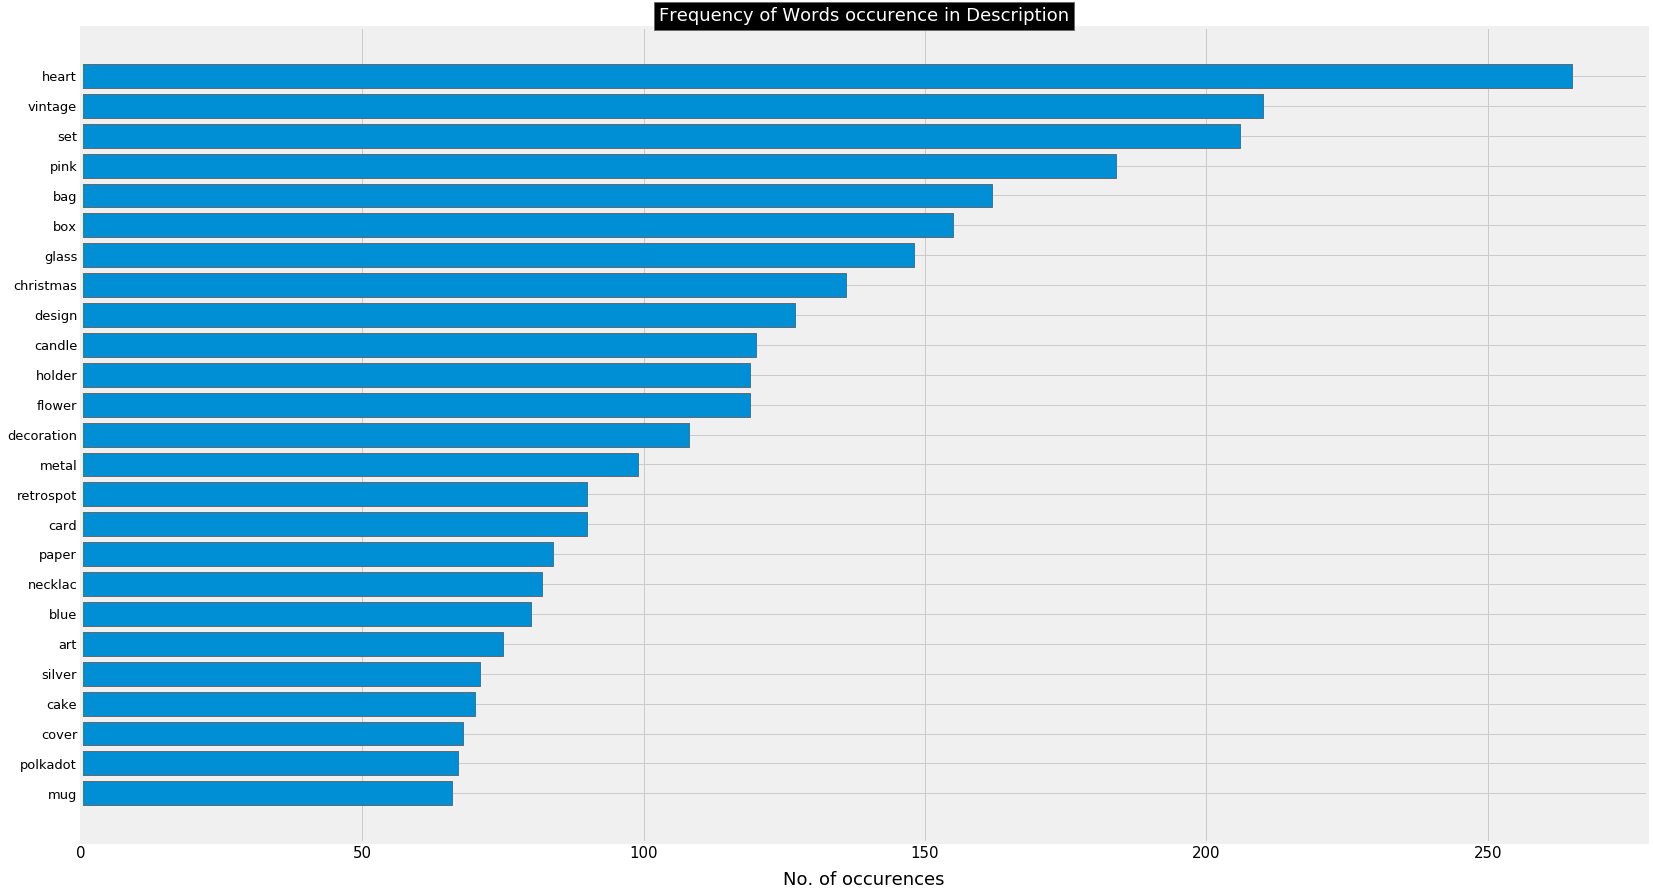

In [25]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
lists = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(25, 15))
y_axis = [i[1] for i in lists[:25]]
x_axis = [k for k,i in enumerate(lists[:25])]
x_label = [i[0] for i in lists[:25]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Frequency of Words occurence in Description",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 18)
plt.show()

In [26]:
df_cleaned['Revenue'] = (df_cleaned.Quantity - df_cleaned.QuantityCanceled)* df_cleaned.UnitPrice
df_cleaned.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
5 2010-12-01 08:26:00       7.65     17850.0  United Kingdom   
6 2010-12-01 08:26:00       4.25     17850.0  United Kingdom   
7 2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
8 2010-12-01 08:28:00       1.85     17850.0  United Kingdom   
9 2010-12-01 08:34:00       1.69     13047.0  United Kingdom   

   QuantityCanceled  Revenue  
0                 0    15.30  
1                 0    20.34  
2                 0    22.00  
3                 0    20.34  
4                 0    20.34  
5                 0    15.30  
6                 0    25.50  
7                 0    11.10  
8                 0    11.10  
9                 0    54.08

(16538, 4)

CustomerID InvoiceNo  Basket_Price         InvoiceDate
1      12747.0    537215        358.56 2010-12-05 15:38:00
10     12747.0    577104        312.73 2011-11-17 17:13:00
9      12747.0    569397        675.38 2011-10-04 08:26:00
8      12747.0    563949        301.70 2011-08-22 10:38:00
7      12747.0    558265        376.30 2011-06-28 10:06:00

CustomerID InvoiceNo  Basket_Price         InvoiceDate
15426     17850.0    536365        139.12 2010-12-01 08:26:00
15427     17850.0    536366         22.20 2010-12-01 08:28:00
979       13047.0    536367        278.73 2010-12-01 08:34:00
980       13047.0    536368         70.05 2010-12-01 08:34:00
981       13047.0    536369         17.85 2010-12-01 08:35:00

purchase count of observation in each price_range: [1067, 977, 3766, 7416, 2372, 863, 68]


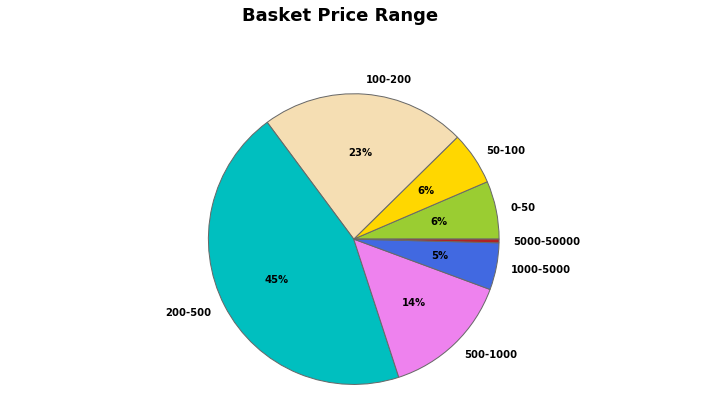

In [27]:
#___________________________________________ 
# Renamed the Revenue column as Basket_Price
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
basket_price = temp.rename(columns = {'Revenue':'Basket_Price'})


#_____________________
# Order Date
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price.head()


#______________________________________
# selecting entities generating positive revenue  :
basket_price = basket_price[basket_price['Basket_Price'] > 0]

display(basket_price.shape)
display(basket_price.sort_values('CustomerID')[0:5])
display(basket_price.sort_values('InvoiceNo')[:5])

#____________________
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket_Price'] < price) &
                       (basket_price['Basket_Price'] > price_range[i-1])]['Basket_Price'].count()
    count_price.append(val)

print('purchase count of observation in each price_range: {}'.format(count_price))
#____________________________________________
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}-{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Basket Price Range", ha='center', fontsize = 18);

In [28]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)

listz_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), listz_products))

In [29]:
X.head()

heart  vintage  set  bag  box  glass  christmas  design  candle  holder  \
0      1        0    0    0    0      0          0       0       0       1   
1      0        0    0    0    0      0          0       0       0       0   
2      1        0    0    0    0      0          0       0       0       0   
3      0        0    0    0    0      0          0       0       0       0   
4      1        0    0    0    0      0          0       0       0       0   

   ...  tidy  plant  house  square  diner  lace  pan  jewel  wallet  point  
0  ...     0      0      0       0      0     0    0      0       0      0  
1  ...     0      0      0       0      0     0    0      0       0      0  
2  ...     0      0      0       0      0     0    0      0       0      0  
3  ...     0      0      0       0      0     0    0      0       0      0  
4  ...     0      0      0       0      0     0    0      0       0      0  

[5 rows x 192 columns]

In [30]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '>{}'.format(threshold[i])
    else:
        col = '{}<-<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(listz_products):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [31]:
X_copy = X.copy(deep = True)
X.head(10)

heart  vintage  set  bag  box  glass  christmas  design  candle  holder  \
0      1        0    0    0    0      0          0       0       0       1   
1      0        0    0    0    0      0          0       0       0       0   
2      1        0    0    0    0      0          0       0       0       0   
3      0        0    0    0    0      0          0       0       0       0   
4      1        0    0    0    0      0          0       0       0       0   
5      0        0    1    0    1      0          0       0       0       0   
6      0        0    0    0    0      1          0       0       0       1   
7      0        0    0    0    0      0          0       0       0       0   
8      0        0    0    0    0      0          0       0       0       0   
9      0        0    0    0    0      0          0       0       0       0   

   ...  pan  jewel  wallet  point  0<-<1  1<-<2  2<-<3  3<-<5  5<-<10  >10  
0  ...    0      0       0      0      0      0      1      0       0    0  
1  ...    0      0       0      0      0      0      0      1       0    0  
2  ...    0      0       0      0      0      0      0      1       0    0  
3  ...    0      0       0      0      0      0      0      1       0    0  
4  ...    0      0       0      0      0      0      0      1       0    0  
5  ...    0      0       0      0      0      0      0      0       1    0  
6  ...    0      0       0      0      0      0      0      1       0    0  
7  ...    0      0       0      0      0      0      1      0       0    0  
8  ...    0      0       0      0      0      1      0      0       0    0  
9  ...    0      0       0      0      0      1      0      0       0    0  

[10 rows x 198 columns]

In [32]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '>{}'.format(threshold[i])
    else:
        col = '{}<-<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<-<1       969                 
1<-<2       997                 
2<-<3       652                 
3<-<5       603                 
5<-<10      468                 
>10         156                 


In [33]:
X.shape

(3845, 198)

In [34]:
matrix = X.as_matrix()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.09518773857070137
For n_clusters = 4 The average silhouette_score is : 0.12752536288729166
For n_clusters = 5 The average silhouette_score is : 0.14646627554699518
For n_clusters = 6 The average silhouette_score is : 0.14084256663071465
For n_clusters = 7 The average silhouette_score is : 0.15077048168136412
For n_clusters = 8 The average silhouette_score is : 0.15470465876902081
For n_clusters = 9 The average silhouette_score is : 0.14372038939928095


In [35]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.1484631010647114


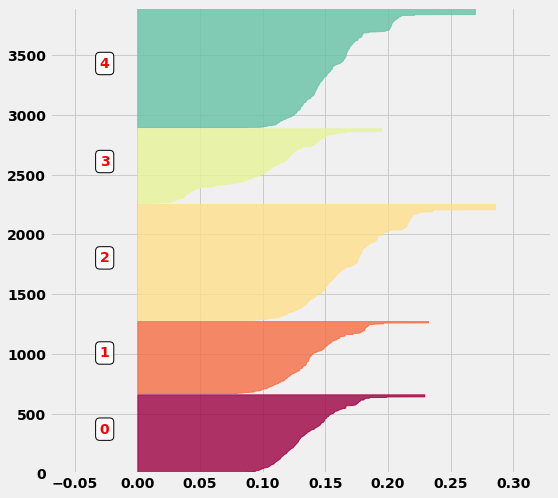

In [36]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [37]:
liste = pd.DataFrame(listz_products)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

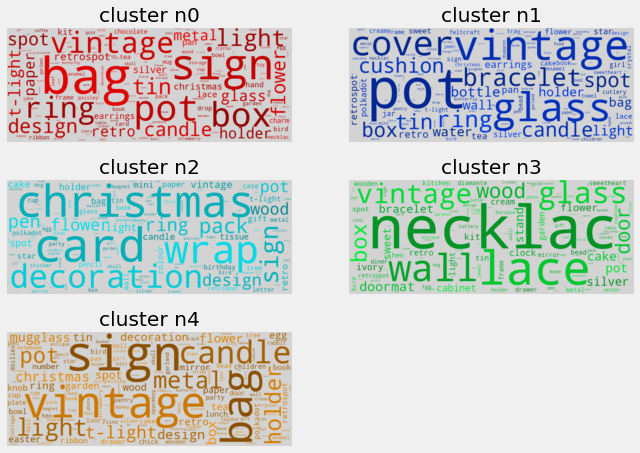

In [38]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]
    
    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster n{}'.format(increment-1))

fig = plt.figure(1, figsize=(10,10))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)

In [44]:
referenceDate = df_cleaned['InvoiceDate'].max()
referenceDate += datetime.timedelta(days = 1)

df_cleaned['Recency'] = (referenceDate - df_cleaned['InvoiceDate']).astype('timedelta64[D]')
dfCustomerHistory = df_cleaned.groupby("CustomerID").min().reset_index()[['CustomerID', 'Recency']]
dfCustomerHistory.head()

CustomerID  Recency
0     12346.0    326.0
1     12747.0      2.0
2     12748.0      1.0
3     12749.0      4.0
4     12820.0      3.0

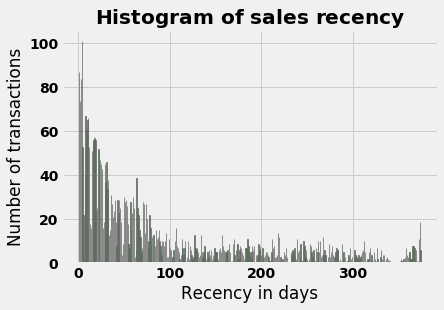

In [45]:
from scipy.stats import norm

x = dfCustomerHistory.Recency
mu = np.mean(dfCustomerHistory.Recency)
sigma = math.sqrt(np.var(dfCustomerHistory.Recency))
n, bins, patches = plt.hist(x, 1000, facecolor="green", alpha=0.75)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')

# plt.subplots_adjust(left=0.15)
# plt.show()
plt.grid(True)

In [46]:
dfCustomerFrequency = df_cleaned[['CustomerID', 'Revenue']].groupby('CustomerID').count().reset_index()
dfCustomerFrequency.rename(columns={'Revenue': 'Frequency'}, inplace= True)
dfCustomerHistory = dfCustomerHistory.merge(dfCustomerFrequency, how="outer")
dfCustomerHistory.head()

CustomerID  Recency  Frequency
0     12346.0    326.0          1
1     12747.0      2.0        103
2     12748.0      1.0       4414
3     12749.0      4.0        199
4     12820.0      3.0         59

In [47]:
dfCustomerMV = df_cleaned[['CustomerID', 'Revenue']].groupby('CustomerID').sum().reset_index()
dfCustomerMV.rename(columns={'Revenue': 'MonetaryValue'}, inplace= True)
dfCustomerHistory = dfCustomerHistory.merge(dfCustomerMV, how="outer")
#add a small number to monetary value to avoid problems with zeros as we transform to log scale
dfCustomerHistory["MonetaryValue"] = dfCustomerHistory["MonetaryValue"] + 0.001
dfCustomerHistory.head()

CustomerID  Recency  Frequency  MonetaryValue
0     12346.0    326.0          1          0.001
1     12747.0      2.0        103       4196.011
2     12748.0      1.0       4414      31176.111
3     12749.0      4.0        199       3868.201
4     12820.0      3.0         59        942.341

In [48]:
#Applying log transformations
dfCustomerHistory['log_Recency'] = dfCustomerHistory["Recency"].apply(math.log)
dfCustomerHistory['log_Frequency'] = dfCustomerHistory["Frequency"].apply(math.log)
dfCustomerHistory['log_MonetaryValue'] = dfCustomerHistory["MonetaryValue"].apply(math.log)

#Preparing matrix for standard scaling transformation
X = dfCustomerHistory[["log_Recency", "log_Frequency", "log_MonetaryValue"]].as_matrix()
#Standardize the features (mean 0 and std. dev 1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

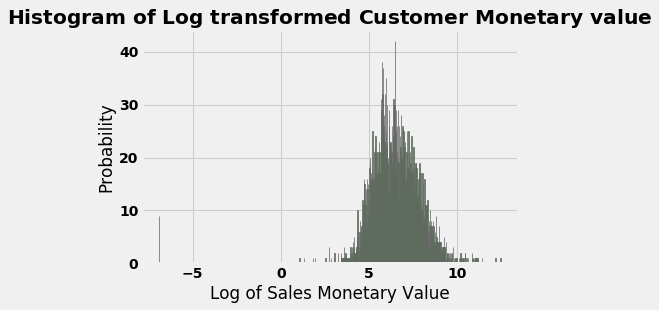

In [49]:
x = dfCustomerHistory.log_MonetaryValue
n, bins, patches = plt.hist(x, 1000, color='green', alpha=0.75)
plt.xlabel('Log of Sales Monetary Value')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetary\ value}\ $')
plt.grid(True)
plt.show()

In [50]:
dfCustomerHistory.head()

CustomerID  Recency  Frequency  MonetaryValue  log_Recency  log_Frequency  \
0     12346.0    326.0          1          0.001     5.786897       0.000000   
1     12747.0      2.0        103       4196.011     0.693147       4.634729   
2     12748.0      1.0       4414      31176.111     0.000000       8.392537   
3     12749.0      4.0        199       3868.201     1.386294       5.293305   
4     12820.0      3.0         59        942.341     1.098612       4.077537   

   log_MonetaryValue  
0          -6.907755  
1           8.341890  
2          10.347407  
3           8.260545  
4           6.848367

Text(0.5, 0, 'MonetaryValue')

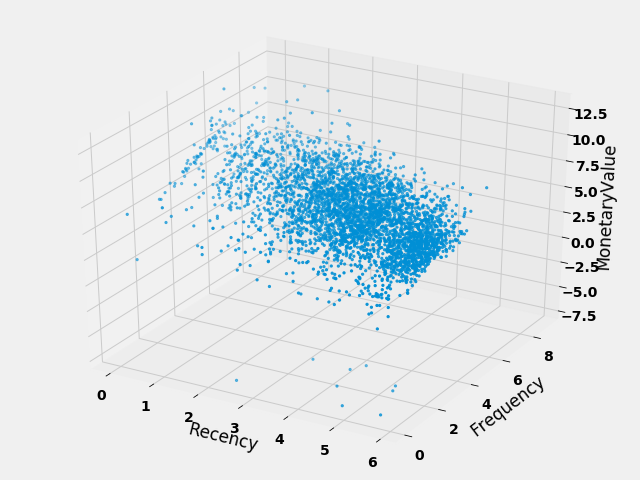

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

xs =dfCustomerHistory.log_Recency
ys = dfCustomerHistory.log_Frequency
zs = dfCustomerHistory.log_MonetaryValue
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MonetaryValue')

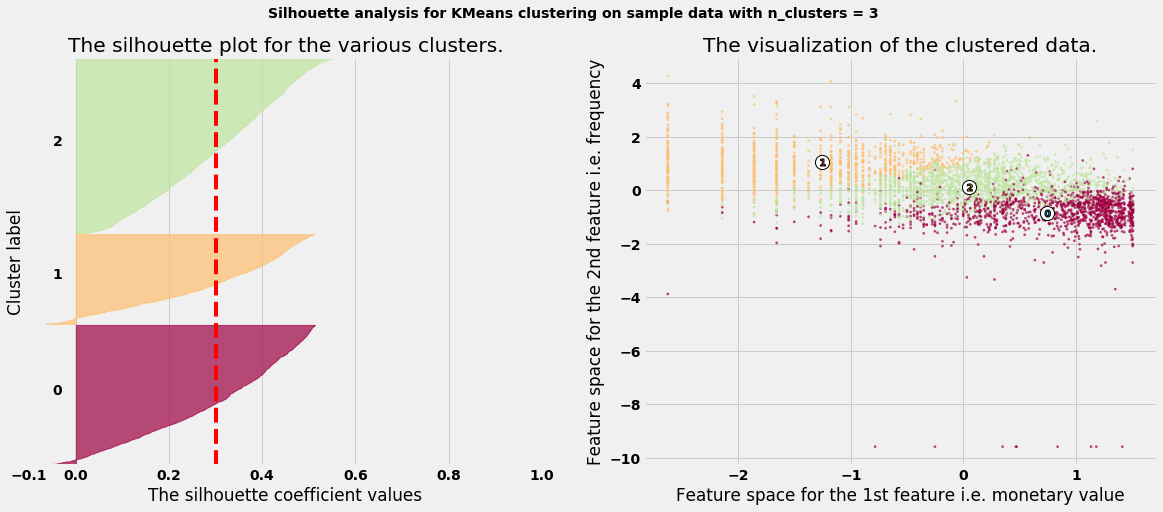

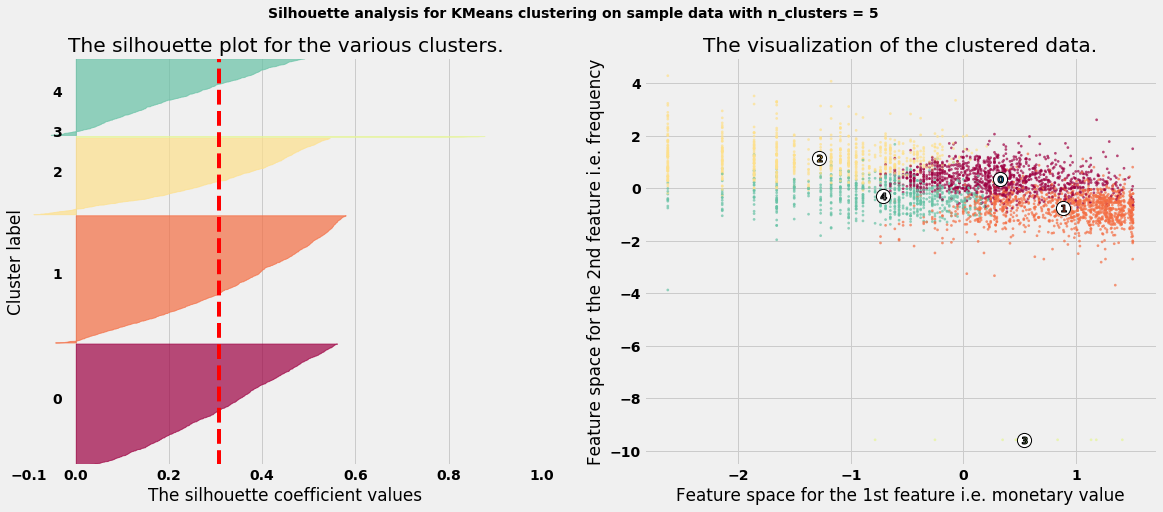

In [52]:
X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #Train a K-means clustering model with 3/ 5 clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    #classify cluster labels based on training data
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [48]:
corresp = dict()
for key, val in zip (listz_products, clusters):
    corresp[key] = val 

df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)
df_cleaned[['InvoiceNo', 'Description', 
            'categ_product']][:10]

InvoiceNo                          Description  categ_product
0    536365   WHITE HANGING HEART T-LIGHT HOLDER              0
1    536365                  WHITE METAL LANTERN              1
2    536365       CREAM CUPID HEARTS COAT HANGER              1
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE              1
4    536365       RED WOOLLY HOTTIE WHITE HEART.              1
5    536365         SET 7 BABUSHKA NESTING BOXES              2
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER              1
7    536366               HAND WARMER UNION JACK              0
8    536366            HAND WARMER RED POLKA DOT              4
9    536367        ASSORTED COLOUR BIRD ORNAMENT              4

In [49]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]
#___________________________________________
# sum of purchases / user & order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
basket_price = temp.rename(columns = {'Revenue':'Basket Price'})
#____________________________________________________________
# percentage of the price of the order / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 
#_____________________
# date of the order
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

CustomerID InvoiceNo  Basket Price  categ_0  categ_1  categ_2  categ_3  \
1      12747.0    537215        358.56    45.90      0.0   232.50      0.0   
10     12747.0    577104        312.73   111.68     15.0   166.25      0.0   
9      12747.0    569397        675.38   313.20      0.0   308.10      0.0   
8      12747.0    563949        301.70    35.40     15.0   231.50      0.0   
7      12747.0    558265        376.30   143.20     15.0   218.10      0.0   

    categ_4         InvoiceDate  
1     80.16 2010-12-05 15:38:00  
10    19.80 2011-11-17 17:13:00  
9     54.08 2011-10-04 08:26:00  
8     19.80 2011-08-22 10:38:00  
7      0.00 2011-06-28 10:06:00

In [50]:
#________________________________________________________________
# Calculating the Frequency(count) and Monetary(sum)
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

# calculating the Recency(last purchase date) & the First_date of purchase
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'Recency'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'First Purchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

# renaming the columns
selected_customers = transactions_per_user.rename(index=str, columns={"count": "Frequency", "sum": "Monetary"})     
selected_customers = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase','categ_0', 'categ_1','categ_2','categ_3','categ_4']]

rfm_data = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase']]
product_data = selected_customers[['CustomerID', 'Monetary','categ_0', 'categ_1','categ_2','categ_3','categ_4']]
product_data.head()

CustomerID  Monetary    categ_0    categ_1    categ_2    categ_3    categ_4
0     12747.0   4196.01  28.893639   2.660861  53.362599   0.972352  14.110548
1     12748.0  31355.11  17.674759  15.040674  25.310324  17.251351  24.722892
2     12749.0   3868.20  12.013857  24.298123  37.929786   4.429967  21.328266
3     12820.0    942.34  28.584163  20.894794   0.000000  20.913895  29.607148
4     12821.0     92.72  21.484038   0.000000  18.334771  38.826575  21.354616

In [51]:
# selecting features for clustering using RFM 
rfm_clustering = selected_customers[['Recency','Frequency', 'Monetary']]

# selecting features for clustering based on previous purchased products
product_clustering = selected_customers[['categ_0','categ_1', 'categ_2','categ_3','categ_4']]

Recency    Frequency       Monetary
count  3912.000000  3912.000000    3912.000000
mean     91.876534     4.227505    1747.337910
std      99.695909     7.134453    6730.162064
min       0.000000     1.000000       2.900000
25%      17.000000     1.000000     292.007500
50%      50.000000     2.000000     635.070000
75%     143.000000     5.000000    1536.315000
max     373.000000   205.000000  259657.300000

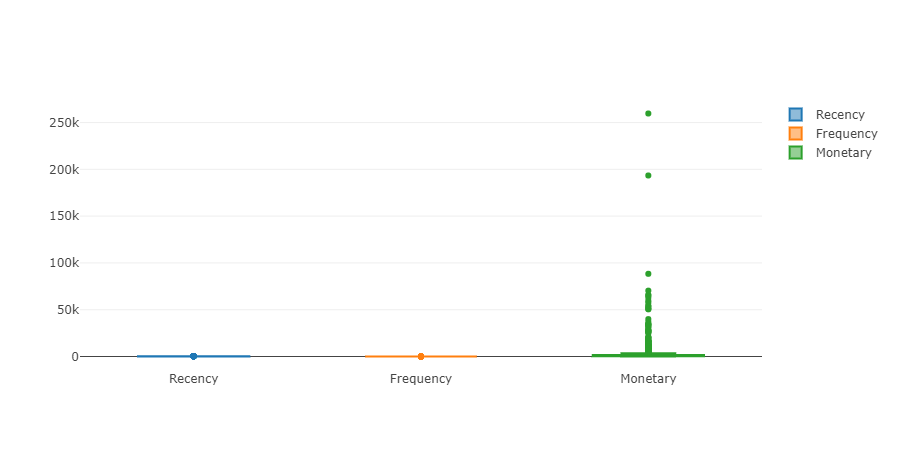

In [52]:
display(rfm_clustering.describe())

recency = go.Box(
    y= rfm_clustering.Recency,
    name = 'Recency'
    
)
frequency = go.Box(
    y=rfm_clustering.Frequency,
    name = 'Frequency'
    
)
monetary = go.Box(
    y=rfm_clustering.Monetary,
    name = 'Monetary'
)
data =[recency, frequency, monetary]

iplot(data)

In [53]:
# Squre Root Transformation
df_sqrt = rfm_clustering
sqrt_df = df_sqrt.apply(np.sqrt)

In [54]:
matrix = sqrt_df.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [ 8.15011469  1.79362304 32.07254545]


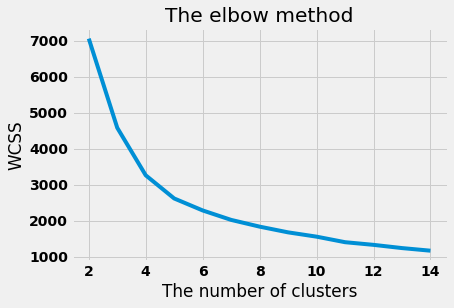

In [55]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.6005040987032123
For n_clusters = 4 The average silhouette_score is : 0.5275894264451666
For n_clusters = 5 The average silhouette_score is : 0.52465916267135
For n_clusters = 6 The average silhouette_score is : 0.4499620301195344
For n_clusters = 7 The average silhouette_score is : 0.41654109169113024
For n_clusters = 8 The average silhouette_score is : 0.39710680789967356
For n_clusters = 9 The average silhouette_score is : 0.4061793388836684


In [57]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.403


In [58]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

1     2     4    0   3
nb. of customers  1499  1101  1001  281  30

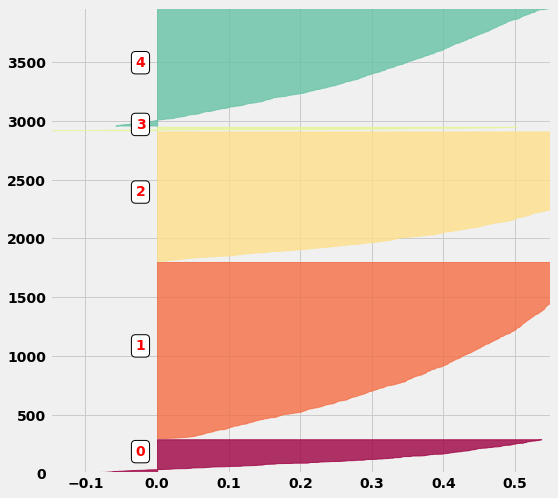

In [59]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [60]:
rfm_data.loc[:, 'cluster'] = clusters_clients
rfm_data.head()
# pd.DataFrame.to_csv(selected_customers,'/Users/deepanshparab/Desktop/OnlineRetail/data/after_cluster.csv')

CustomerID  Recency  Frequency  Monetary  First Purchase  cluster
0     12747.0        2         11   4196.01             369        0
1     12748.0        0        205  31355.11             373        3
2     12749.0        3          5   3868.20             213        4
3     12820.0        3          4    942.34             326        4
4     12821.0      214          1     92.72             214        2

In [61]:
pd.DataFrame.to_csv(selected_customers,'after_cluster.csv')

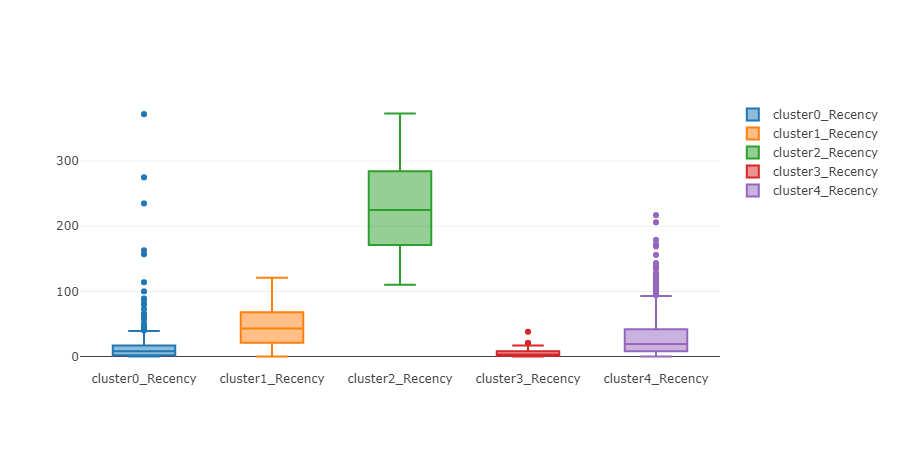

In [62]:
# plotting cluster recency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Recency,
    name = 'cluster0_Recency'
)

trace1 = go.Box(
    y=cls1.Recency,
    name = 'cluster1_Recency'
)
trace2 = go.Box(
    y=cls2.Recency,
    name = 'cluster2_Recency'
)
trace3 = go.Box(
    y=cls3.Recency,
    name = 'cluster3_Recency'
)
trace4 = go.Box(
    y=cls4.Recency,
    name = 'cluster4_Recency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

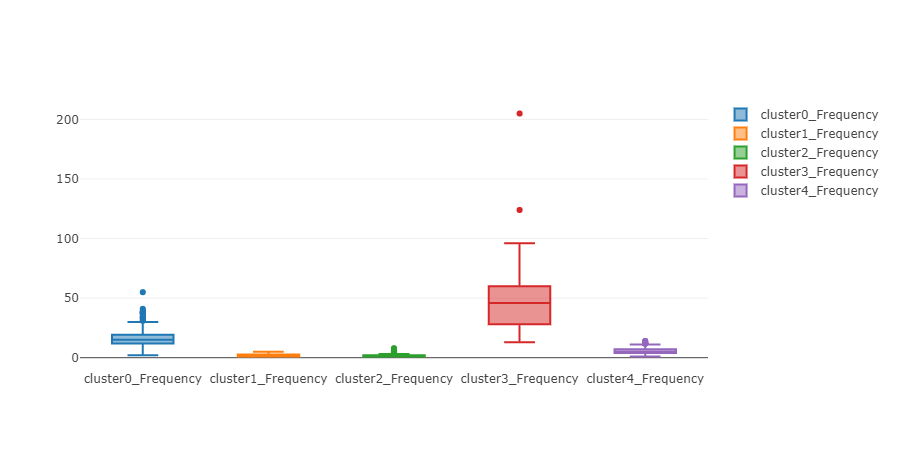

In [63]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Frequency,
    name = 'cluster0_Frequency'
)

trace1 = go.Box(
    y=cls1.Frequency,
    name = 'cluster1_Frequency'
)
trace2 = go.Box(
    y=cls2.Frequency,
    name = 'cluster2_Frequency'
)
trace3 = go.Box(
    y=cls3.Frequency,
    name = 'cluster3_Frequency'
)
trace4 = go.Box(
    y=cls4.Frequency,
    name = 'cluster4_Frequency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

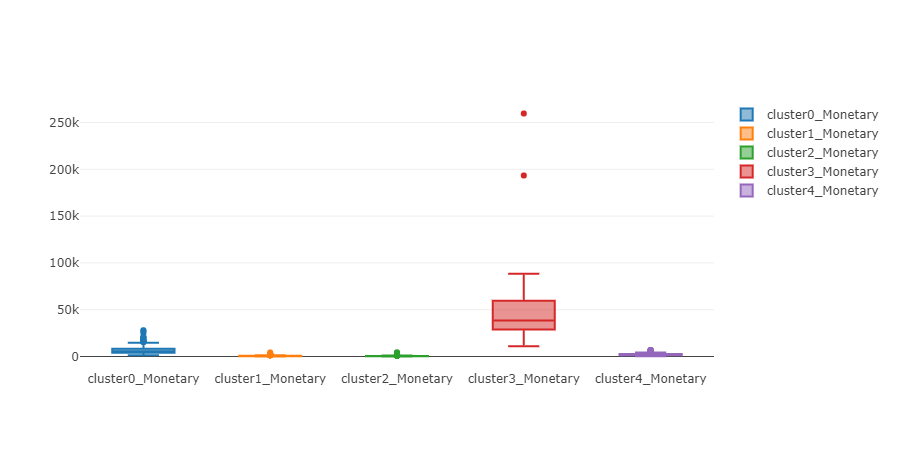

In [64]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Monetary,
    name = 'cluster0_Monetary'
)

trace1 = go.Box(
    y=cls1.Monetary,
    name = 'cluster1_Monetary'
)
trace2 = go.Box(
    y=cls2.Monetary,
    name = 'cluster2_Monetary'
)
trace3 = go.Box(
    y=cls3.Monetary,
    name = 'cluster3_Monetary'
)
trace4 = go.Box(
    y=cls4.Monetary,
    name = 'cluster4_Monetary'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [65]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(rfm_data[rfm_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = rfm_data[rfm_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________

print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 3912


CustomerID     Recency  Frequency      Monetary  First Purchase  \
cluster                                                                      
2.0      15593.872843  231.806540   1.544959    422.360092      262.998183   
1.0      15594.432288   46.038025   1.893929    526.933918      137.575717   
4.0      15482.169830   30.181818   5.768232   1996.501329      271.465534   
0.0      15583.569395   17.113879  16.483986   6915.607117      337.313167   
3.0      15306.666667    5.666667  53.066667  54630.335667      353.766667   

         size  
cluster        
2.0      1101  
1.0      1499  
4.0      1001  
0.0       281  
3.0        30

In [66]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

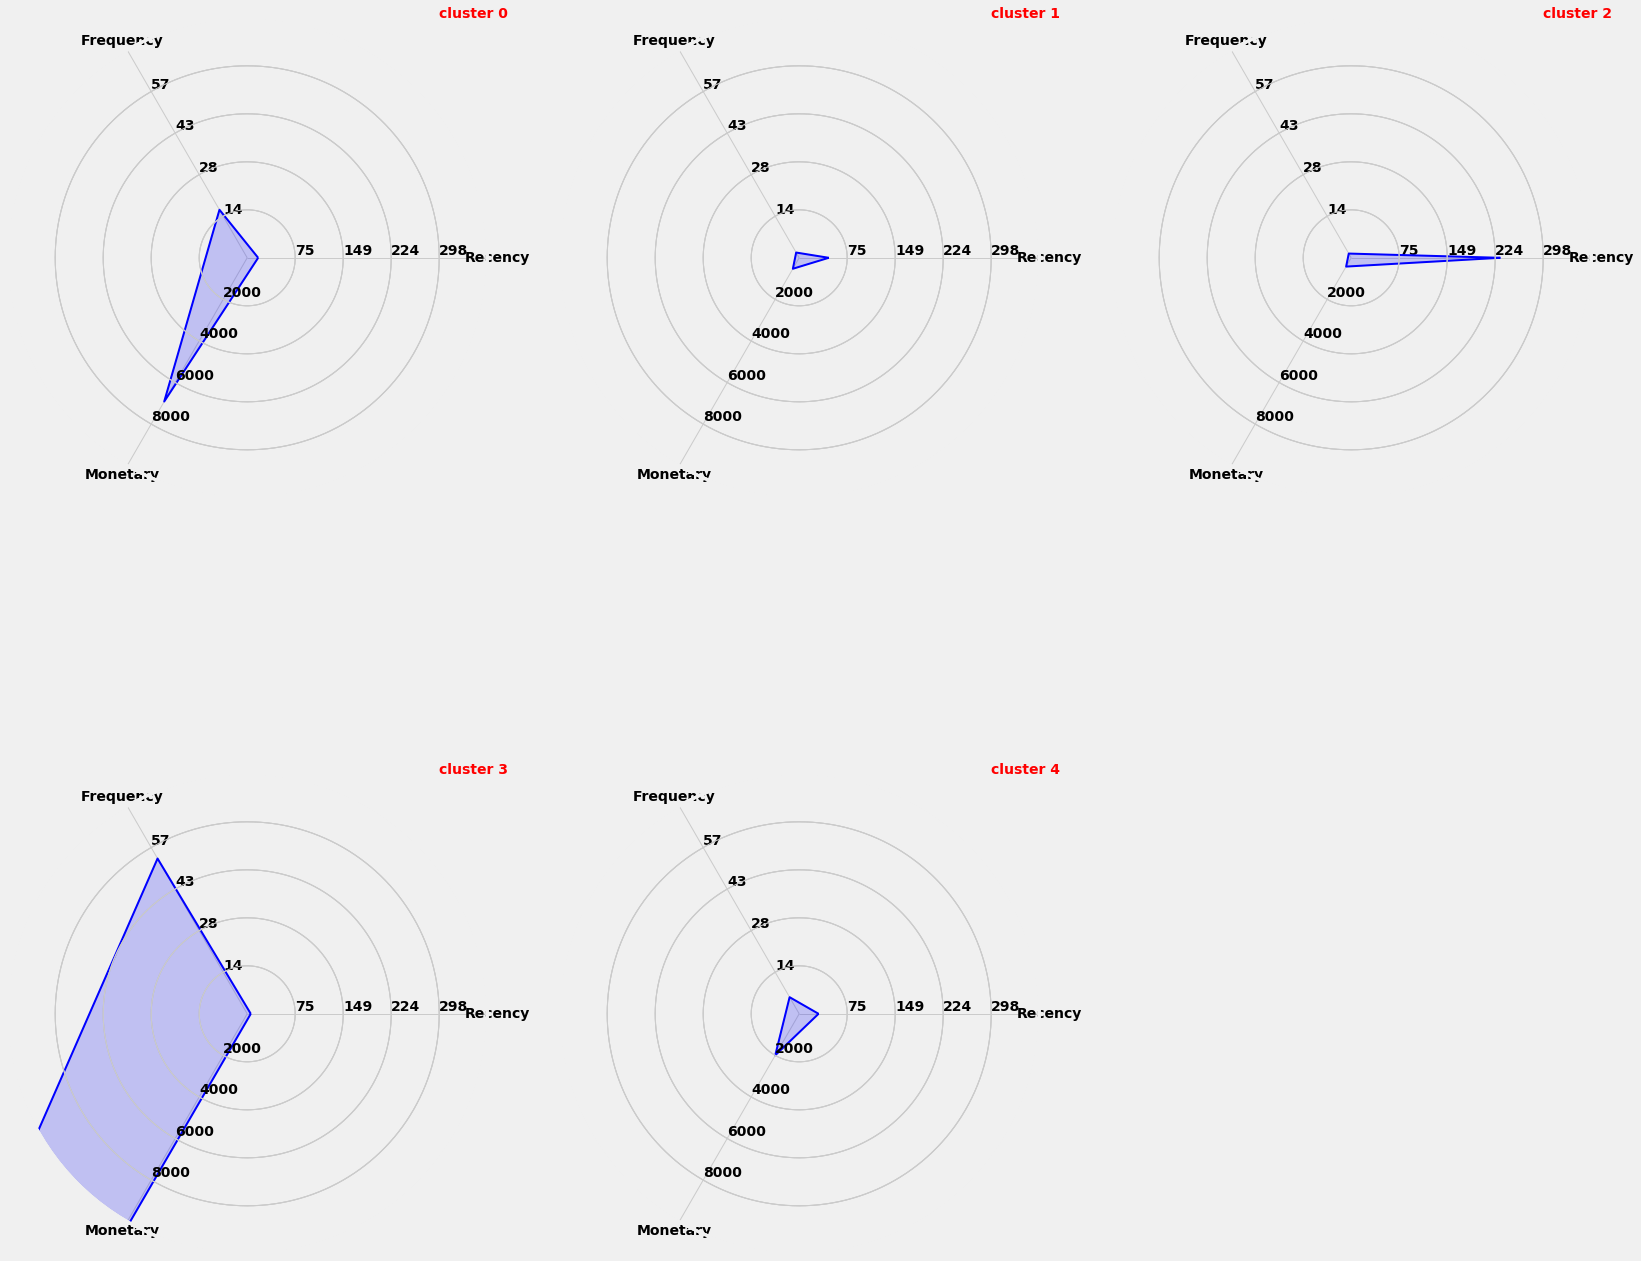

In [67]:
fig = plt.figure(figsize=(20,10))

attributes = ['Recency','Frequency', 'Monetary']
ranges = [[0.1, 373], [0.1, 71], [0.01, 10000]]
index  = [0, 1, 2, 3, 4]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1

In [68]:
matrix = product_clustering.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [21.82878961 16.61977807 22.11345042 14.27138396 25.1736407 ]


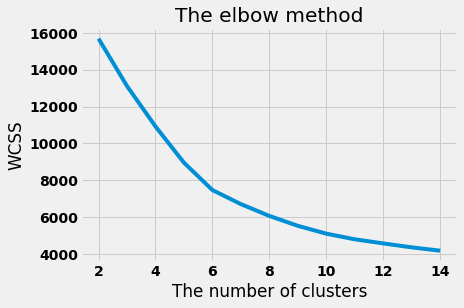

In [69]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
n_clusters = 6
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.280


In [71]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

4    2    0    5    3    1
nb. of customers  1881  584  520  317  306  304

In [72]:
product_data.loc[:, 'cluster'] = clusters_clients

In [73]:
product_data.head(10)

CustomerID  Monetary    categ_0    categ_1     categ_2    categ_3  \
0     12747.0   4196.01  28.893639   2.660861   53.362599   0.972352   
1     12748.0  31355.11  17.674759  15.040674   25.310324  17.251351   
2     12749.0   3868.20  12.013857  24.298123   37.929786   4.429967   
3     12820.0    942.34  28.584163  20.894794    0.000000  20.913895   
4     12821.0     92.72  21.484038   0.000000   18.334771  38.826575   
5     12822.0    918.98  50.072907  12.143899    6.518096  15.421446   
6     12823.0   1759.50   0.000000   0.000000  100.000000   0.000000   
7     12824.0    397.12  26.379936  13.421636   20.321313  23.559629   
8     12826.0   1468.12  41.052503   7.901261    1.532572  13.515244   
9     12827.0    430.15   0.000000  19.748925   41.427409   8.229687   

     categ_4  cluster  
0  14.110548        0  
1  24.722892        4  
2  21.328266        4  
3  29.607148        4  
4  21.354616        1  
5  15.843653        5  
6   0.000000        0  
7  16.317486        4  
8  35.998420        4  
9  30.593979        4

In [74]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(product_data[product_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = product_data[product_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 3912


Monetary    categ_0    categ_1    categ_2    categ_3    categ_4  \
cluster                                                                       
1.0       735.613750  12.253424   6.398732   8.125457  53.988476  19.233911   
2.0      1060.556149  14.624769   8.043449   9.145471  13.787273  54.402207   
3.0      1187.525850  13.397442  52.662537  14.217956   6.580585  13.166946   
0.0      1908.625540  11.013930  10.971209  62.019725   4.939907  11.066274   
5.0      1918.332145  62.742847   7.583326   8.654349   6.868099  14.151379   
4.0      2141.741123  23.079200  18.155398  20.920970  13.081229  24.769670   

         size  
cluster        
1.0       304  
2.0       584  
3.0       306  
0.0       520  
5.0       317  
4.0      1881

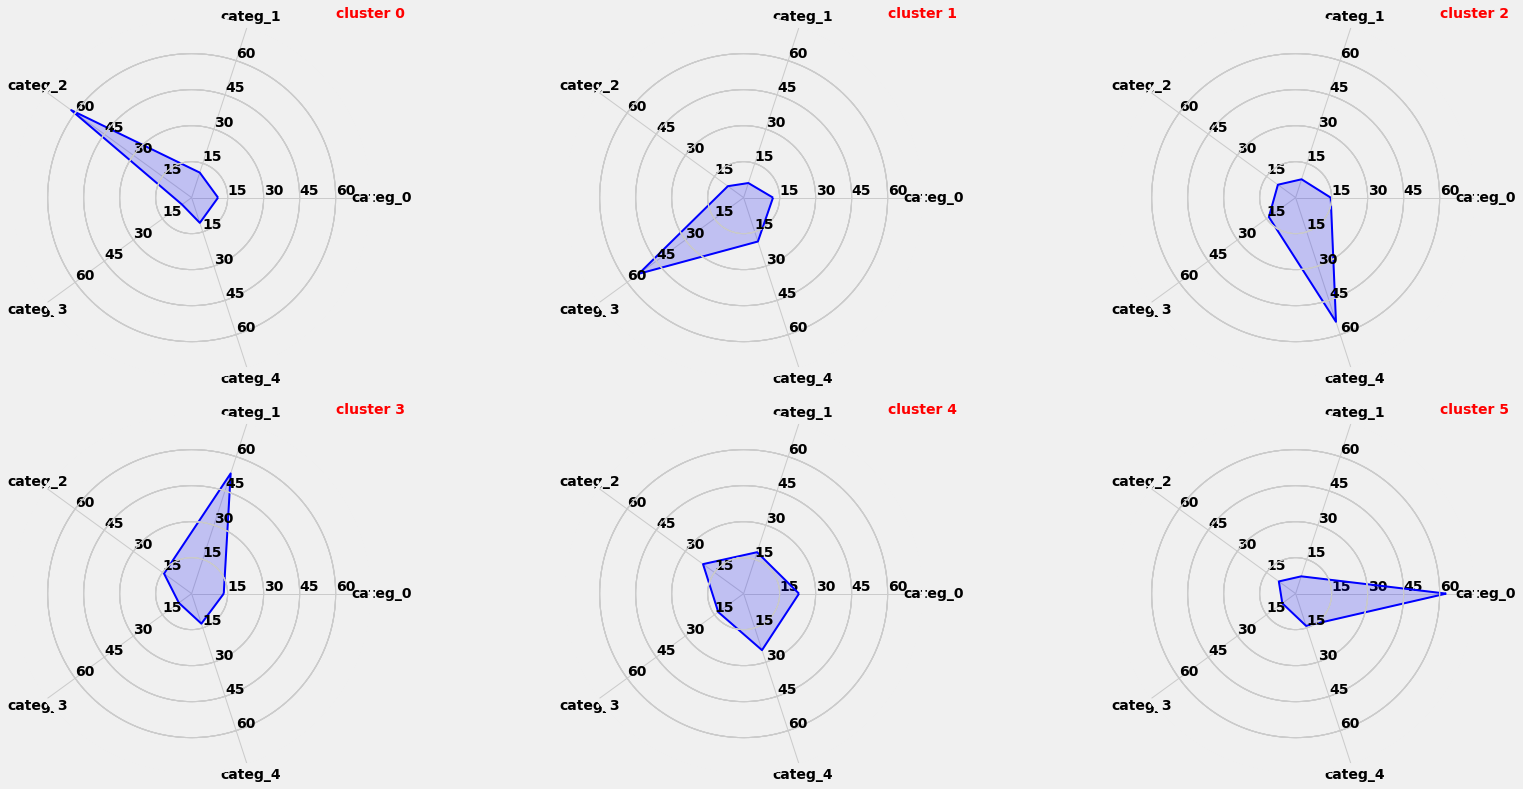

In [75]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

fig = plt.figure(figsize=(20,10))

attributes = ['categ_0','categ_1', 'categ_2','categ_3','categ_4']
ranges = [[0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1